In [8]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
# initialization
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer,ClassicalRegister,QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-18 03:00:41,797: Credentials are already in use. The existing account in the session will be replaced.


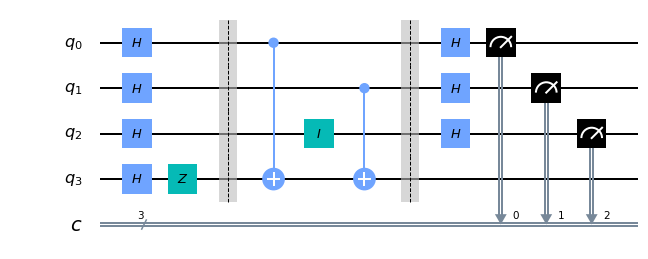

In [5]:
# Bernstein-Vazirani Algorithm:
# Much like the Deutsch-Josza Algorithm.
# We are given a black-box funtion f,
# which takes a string of bits x.
# And returns either 0 or 1.
# Instead of the function being either balanced or constant 
# the function is guaranteed to return the bitwise produc of the input
# with some string, s. That is to say:
# given an input x, f(x) = s * x%2.
# Where we are asked to find s

# ======= CLASSICAL SOLUTION: ======= 
# classically the oracle returns: fs(x) = s*x %2
# Given an input x. Thus, the hidden bit string s can be revealed by 
# querying the oracle with the sequence of inputs:
#      1000...00, 0100...00, 0010...00, 0000...01
# Where each query revelas a different s with x = 0100...00 we can find the next least 
# significant bit of s and so on.
# Therefore we would need to call fs(x), a total of n times.

# ======= Quantum Solution: =======
# Using a quantum computer, we can solve this problem with 100% confidence 
# after only one call to the function f(x). 
# the following is the algorithmic steps:
# 1. Initialise the imputs qubits to the |0>^(cnot n)  state, and output the qubit to |->
# 2. Apply Hadamard gates to the input register. // place in superposition
# 3. Query the oracle
# 4. Apply Hadamard gates to the input register //undue super position.
# 5. Measure


n = 3
s = '011'

# we need a circuit with n qubits, plus one ancilla qubit.
bv_circuit = QuantumCircuit(n+1,n)

# put ancilla in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Apply barrier
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1]
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q,n)

# Apply barrier
bv_circuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i,i)

bv_circuit.draw()
        


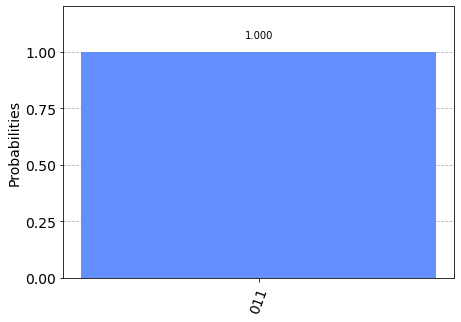

In [6]:
# running our circuit on the qasm sumulator:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bv_circuit,backend=backend,shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)


ibmqfactory.load_account:WARNING:2020-06-18 03:04:07,871: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmqx2
Job Status: job has successfully run


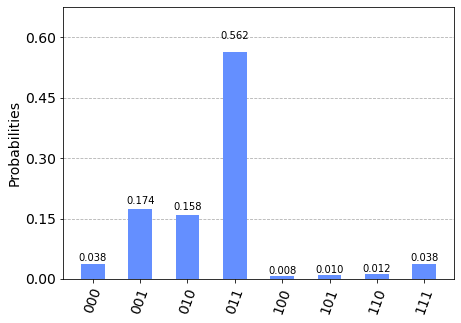

In [10]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

shots = 1024
job = execute(bv_circuit,backend=backend,shots=shots)
job_monitor(job,interval = 2)

results = job.result()
answer = results.get_counts()

plot_histogram(answer)
